- Health care: Heart attack possibility

In [282]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 
import pandas_profiling as pp 

data = pd.read_csv("heart.csv")

- Preproccesing 

In [283]:
pp.ProfileReport(data)

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  1.41it/s]


In [284]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [285]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [286]:

# histogram and skewness 
# boxplots for outlier values
def skewnes_outliers(features,data=data):

    size=len(features)
    x=5
    y=int(size/5)
    
    fig ,ax =plt.subplots(y,x,figsize=(20,5*y),constrained_layout=True)
    ax = ax.ravel()

    for index ,value in enumerate(features):
        sns.histplot(x=value, data=data,ax=ax[index],kde=True)
        ax[index].set_title(f"skewnes {np.around(data[value].skew(),2)}")

    fig ,ax =plt.subplots(y,x,figsize=(20,5),constrained_layout=True)
    ax = ax.ravel()

    for index ,value in enumerate(features):
        data[[value]].boxplot(ax=ax[index])

    plt.show()

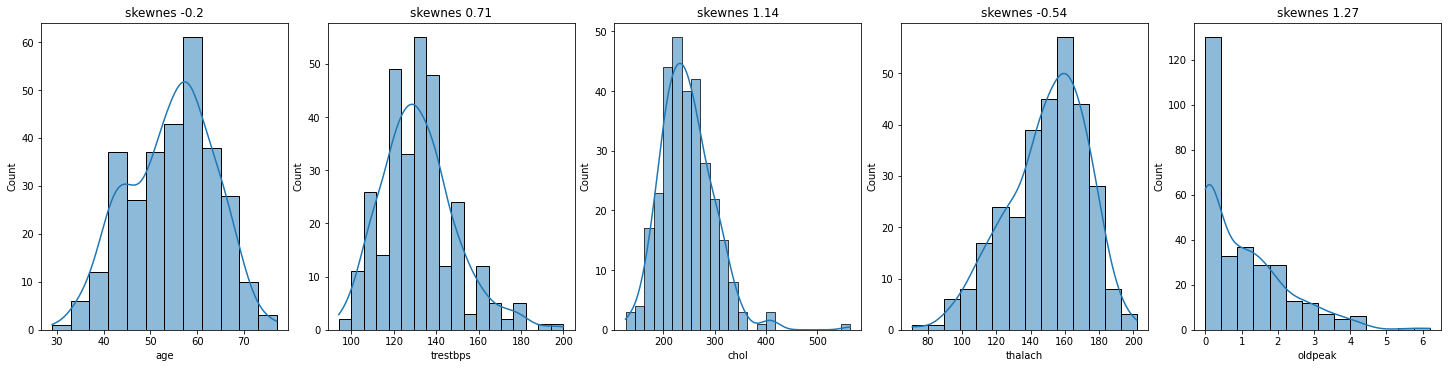

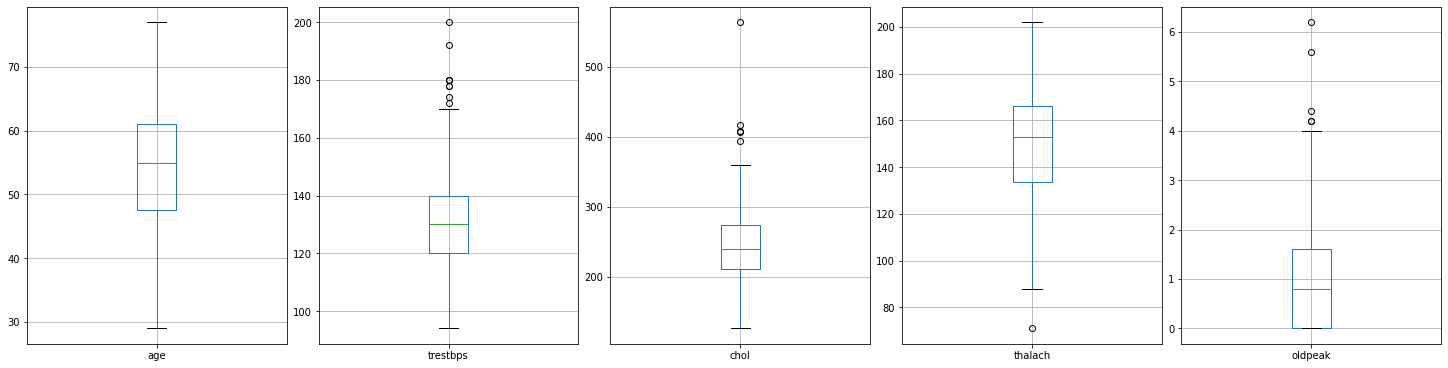

In [287]:
# skewnes and outlier values
normal_features=["age","trestbps","chol","thalach" , "oldpeak"]
skewnes_outliers(normal_features)

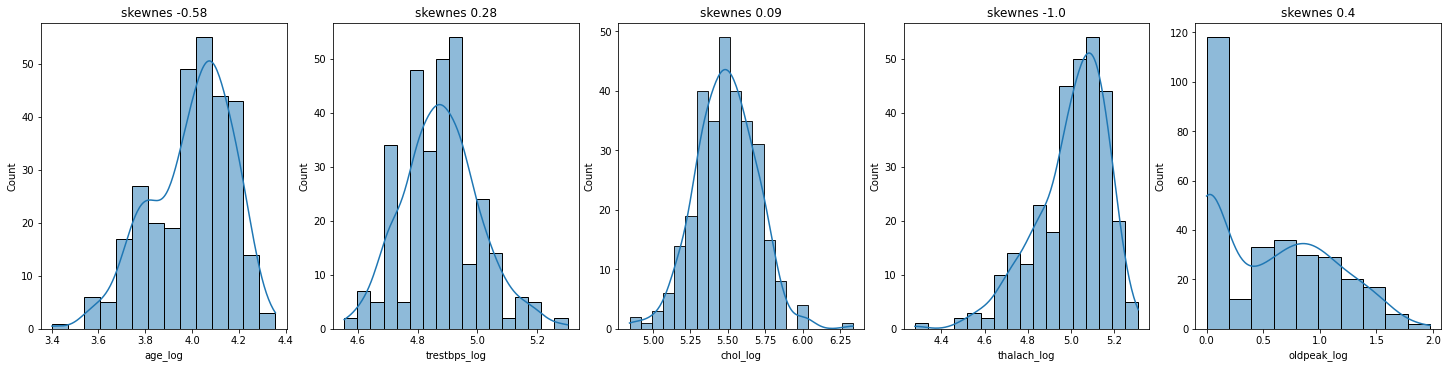

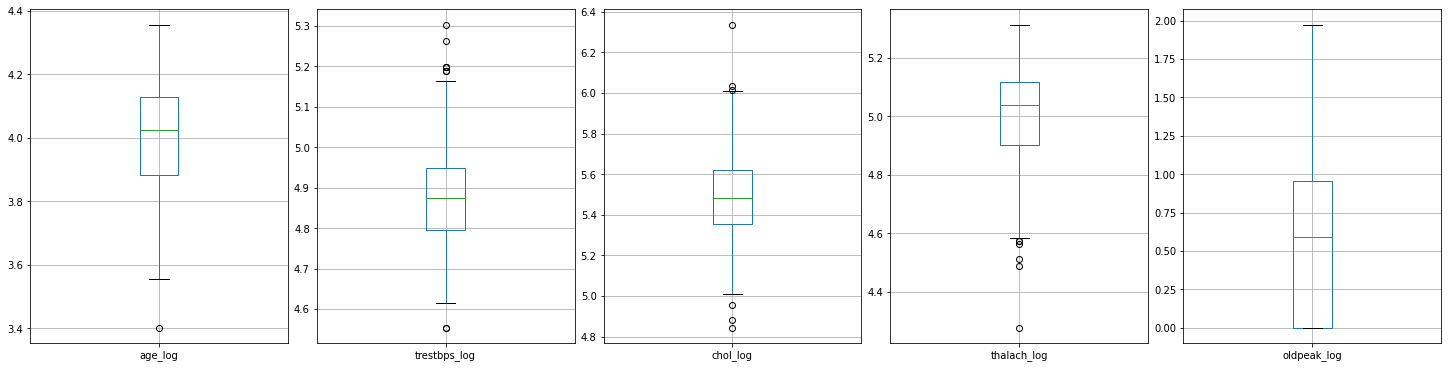

In [288]:
# skewness values after log transformation 
# outlier values after log transformation
for index, value in enumerate(normal_features):
    log = (f'{value}_log')
    data[log] = data[value].apply(lambda x: np.log(x+1))

log_tranformed_features=[f'{name}_log' for name in normal_features ]

skewnes_outliers(log_tranformed_features)

In [289]:
no_outlier_data=data.copy()
#replace outlier values with median of data 
for index,value in enumerate(normal_features+log_tranformed_features) :
    q1,q3=np.percentile(data[value],[25,75])
    inter_quartile=q3-q1
    max= q3 + inter_quartile*1.5
    min= q1 - inter_quartile*1.5 
    
    no_outlier_data.loc[np.logical_or(data[value].values>max,data[value].values<min),value]=no_outlier_data[value].median()
   

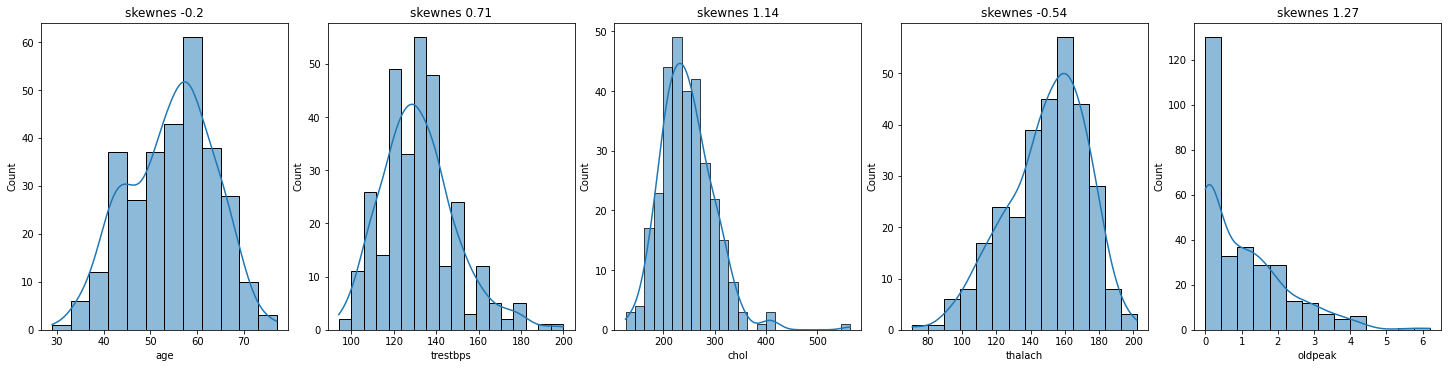

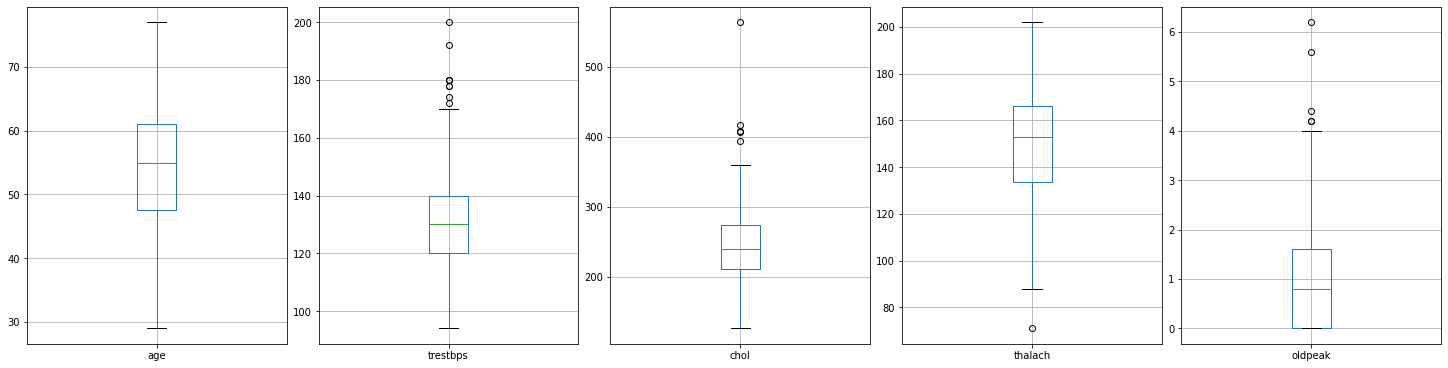

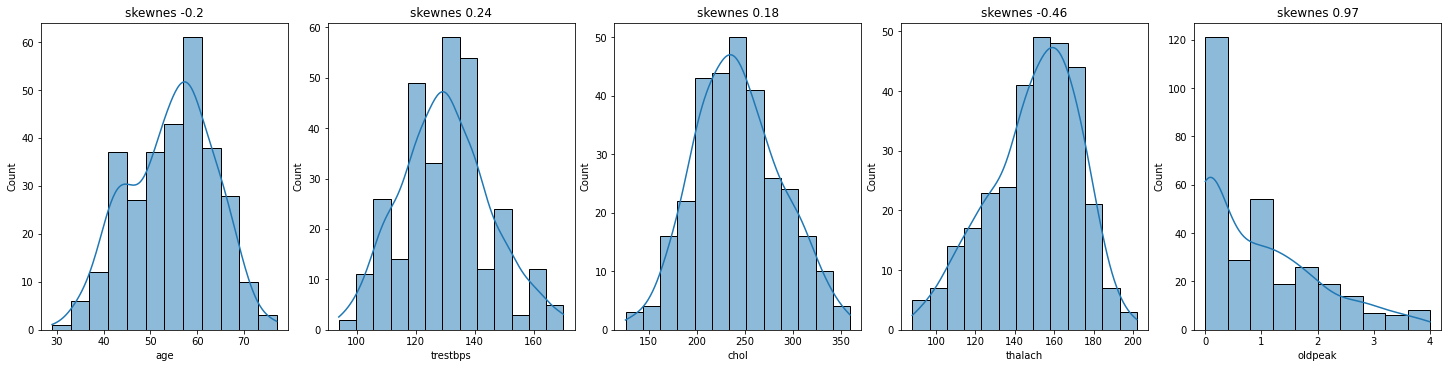

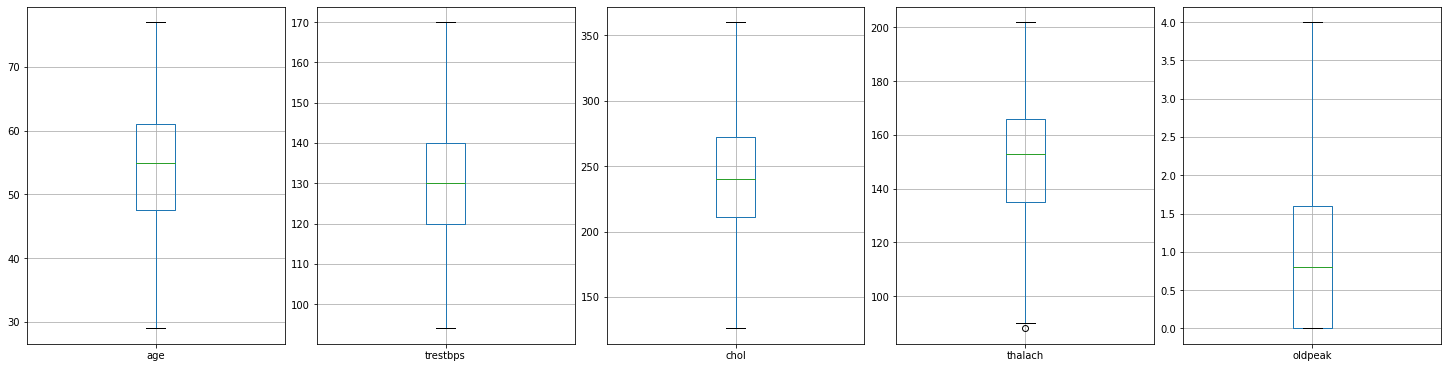

In [290]:
# before and ofter handle outlier values 
skewnes_outliers(normal_features,data=data)
skewnes_outliers(normal_features,data=no_outlier_data)

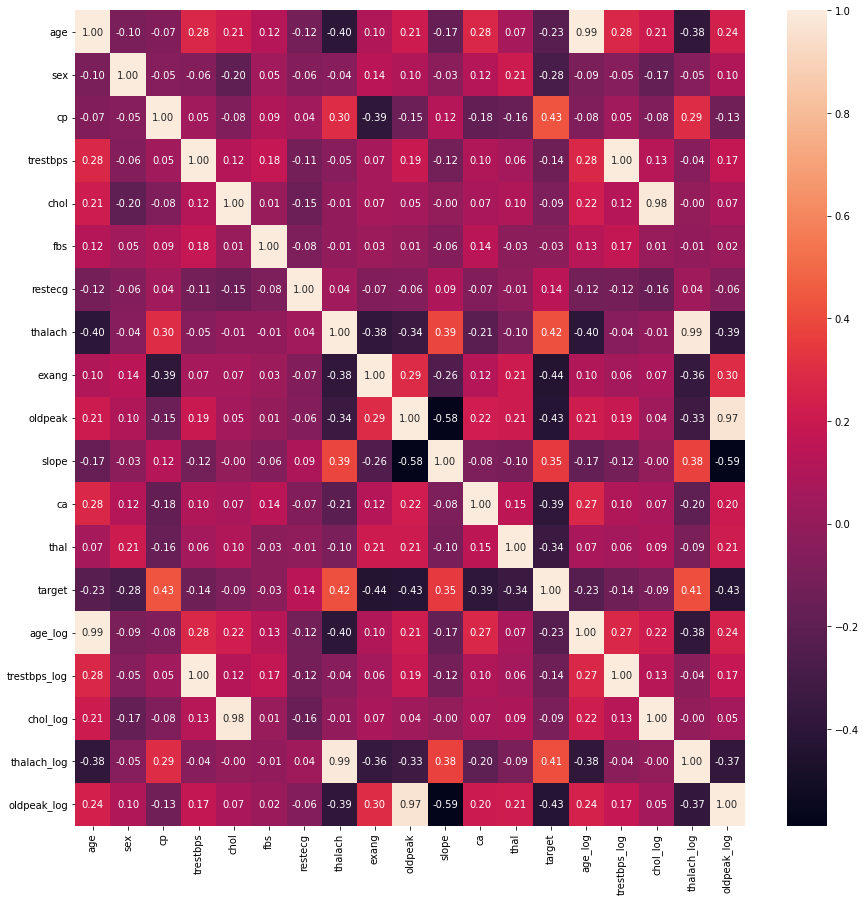

In [291]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True,fmt='.2f')
plt.show()

- Train model

In [292]:
# features and target 
def x_and_y(data,features,target):
    x=data[features].values
    y=data[target].values
    return x,y

In [293]:
features=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']
target='target'
x,y=x_and_y(data,features,target)

In [294]:
#train model with default features 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=42)

logistic=LogisticRegression(solver='liblinear')
logistic.fit(x_train,y_train)
y_pred=logistic.predict(x_test)

print("Default features\n")
print("Accuracy is ",accuracy_score(y_test,y_pred))
print("Confusion matrix \n",confusion_matrix(y_test,y_pred))

Default features

Accuracy is  0.8688524590163934
Confusion matrix 
 [[25  4]
 [ 4 28]]


In [295]:
# train model with no outlier features 
x,y=x_and_y(no_outlier_data,features,target)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=42)

logistic=LogisticRegression(solver='liblinear')
logistic.fit(x_train,y_train)
y_pred=logistic.predict(x_test)

print("No outlier features\n")
print("Accuracy is ",accuracy_score(y_test,y_pred))
print("Confusion matrix \n",confusion_matrix(y_test,y_pred))

No outlier features

Accuracy is  0.8688524590163934
Confusion matrix 
 [[24  5]
 [ 3 29]]


In [298]:
#train model with log transformed features 
features=['age_log','sex','cp','trestbps_log','chol_log','fbs','restecg','thalach_log','exang','oldpeak_log','slope','ca','thal']

x,y=x_and_y(data,features,target)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=42)

logistic=LogisticRegression(solver='liblinear')
logistic.fit(x_train,y_train)
y_pred=logistic.predict(x_test)

print("Log transformed features \n")
print("Accuracy is ",accuracy_score(y_test,y_pred))
print("Confusion matrix \n",confusion_matrix(y_test,y_pred))

Log transformed features 

Accuracy is  0.8524590163934426
Confusion matrix 
 [[25  4]
 [ 5 27]]


In [300]:
#train model with mixed (log transformed and not ) features 
features=['age','sex','cp','trestbps_log','chol_log','fbs','restecg','thalach','exang','oldpeak_log','slope','ca','thal']

x,y=x_and_y(data,features,target)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=42)

logistic=LogisticRegression(solver='liblinear')
logistic.fit(x_train,y_train)
y_pred=logistic.predict(x_test)

print("Mixed features \n")
print("Accuracy is ",accuracy_score(y_test,y_pred))
print("Confusion matrix \n",confusion_matrix(y_test,y_pred))

Mixed features 

Accuracy is  0.8688524590163934
Confusion matrix 
 [[25  4]
 [ 4 28]]
